<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><strong>Описание проекта</strong></a></span><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.1">Описание данных</a></span></li></ul></li><li><span><a href="#Исследование-данных" data-toc-modified-id="Исследование-данных-2"><strong>Исследование данных</strong></a></span><ul class="toc-item"><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-2.1">Знакомство с данными</a></span></li><li><span><a href="#Пропущенные-значения,-типы-данных-и-дубликаты" data-toc-modified-id="Пропущенные-значения,-типы-данных-и-дубликаты-2.2">Пропущенные значения, типы данных и дубликаты</a></span></li></ul></li><li><span><a href="#Приоритизация-гипотез" data-toc-modified-id="Приоритизация-гипотез-3"><strong>Приоритизация гипотез</strong></a></span></li><li><span><a href="#Анализ-A/B-теста" data-toc-modified-id="Анализ-A/B-теста-4"><strong>Анализ A/B-теста</strong></a></span><ul class="toc-item"><li><span><a href="#Графический-анализ-метрик" data-toc-modified-id="Графический-анализ-метрик-4.1">Графический анализ метрик</a></span><ul class="toc-item"><li><span><a href="#Кумулятивная-выручка" data-toc-modified-id="Кумулятивная-выручка-4.1.1">Кумулятивная выручка</a></span></li><li><span><a href="#Кумулятивный-средний-чек" data-toc-modified-id="Кумулятивный-средний-чек-4.1.2">Кумулятивный средний чек</a></span></li><li><span><a href="#Кумулятивная-конверсия" data-toc-modified-id="Кумулятивная-конверсия-4.1.3">Кумулятивная конверсия</a></span></li><li><span><a href="#Количетсво-заказов" data-toc-modified-id="Количетсво-заказов-4.1.4">Количетсво заказов</a></span></li><li><span><a href="#Стоимость-заказов" data-toc-modified-id="Стоимость-заказов-4.1.5">Стоимость заказов</a></span></li></ul></li><li><span><a href="#Подготовка-данных-для-определения-статистической-значимости" data-toc-modified-id="Подготовка-данных-для-определения-статистической-значимости-4.2">Подготовка данных для определения статистической значимости</a></span><ul class="toc-item"><li><span><a href="#Статистическая-значимость-различий-между-группами-по-&quot;сырым&quot;-данным" data-toc-modified-id="Статистическая-значимость-различий-между-группами-по-&quot;сырым&quot;-данным-4.2.1">Статистическая значимость различий между группами по "сырым" данным</a></span></li><li><span><a href="#Статистическая-значимость-различий-между-группами-по-&quot;очищенным&quot;-данным" data-toc-modified-id="Статистическая-значимость-различий-между-группами-по-&quot;очищенным&quot;-данным-4.2.2">Статистическая значимость различий между группами по "очищенным" данным</a></span></li></ul></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><strong>Выводы</strong></a></span></li></ul></div>

# **Описание проекта**
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.  
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

## Описание данных
Таблица `hypothesis`:
- *Hypothesis* — краткое описание гипотезы
- *Reach* — охват пользователей по 10-балльной шкале
- *Impact* — влияние на пользователей по 10-балльной шкале
- *Confidence* — уверенность в гипотезе по 10-балльной шкале
Efforts* — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы

Таблица `orders`:
- *transactionId* — идентификатор заказа
- *visitorId* — идентификатор пользователя, совершившего заказ
- *date* — дата, когда был совершён заказ
- *revenue* — выручка заказа
- *group* — группа A/B-теста, в которую попал заказ

Таблица `visitors`:
- *date* — дата
- *group* — группа A/B-теста
- *visitors* — количество пользователей в указанную дату в указанной группе A/B-теста

# **Исследование данных**

In [1]:
import pandas as pd
from IPython.core.display import display, HTML
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import os

In [2]:
# графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg'
# чтобы отображались все столбцы, е ли их будет много
pd.set_option('display.max_columns', None)
# для отображения полных строк
pd.set_option('display.max_colwidth', 1000)

## Знакомство с данными

In [3]:
# автоматизируем процесс открытия данных
path_list = ['../datasets/hypothesis.csv',
             '../datasets/orders.csv',
             '../datasets/visitors.csv']
hypothesis, orders, visitors = (
    [pd.read_csv(p) for p in path_list]
)
df_list = [hypothesis, orders, visitors]

In [4]:
# оценим размеры данных и посмотрим на первые строки данных
for d, p in zip(df_list, path_list):
    print ('Size of {}: {}'.format(p[9:], d.shape))
    display(HTML(d.head(3).to_html()))

Size of ts/hypothesis.csv: (9, 5)


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3


Size of ts/orders.csv: (1197, 5)


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A


Size of ts/visitors.csv: (62, 3)


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507


## Пропущенные значения, типы данных и дубликаты

In [5]:
def isnull_percent(data, text):
    print ('Доля пропущенных значений '+text+':')
    print ((data.isnull().sum() / data.shape[0]).apply('{:.2%}'.format))

In [6]:
# автоматизируем вывод долей пропущенных значений
name_df_list = ['hypothesis', 'orders', 'visitors']
for d, p in zip(df_list, name_df_list):
    isnull_percent(d, p)
    print ()

Доля пропущенных значений hypothesis:
Hypothesis    0.00%
Reach         0.00%
Impact        0.00%
Confidence    0.00%
Efforts       0.00%
dtype: object

Доля пропущенных значений orders:
transactionId    0.00%
visitorId        0.00%
date             0.00%
revenue          0.00%
group            0.00%
dtype: object

Доля пропущенных значений visitors:
date        0.00%
group       0.00%
visitors    0.00%
dtype: object



Пропусков нет, проверим типы данных.

In [7]:
for d, p in zip(df_list, name_df_list):
    print (p+':')
    print (d.info())
    print ()

hypothesis:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None

orders:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None

visitors:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None



Приведём даты в формат даты. Остальные данные в порядке.

In [8]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

# **Приоритизация гипотез**

In [9]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

In [10]:
hypothesis.sort_values('ICE', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


Наиболее перспективные гипотезы при приоритизации методом ICE: 9, 1, 8, 7 и 3.

In [11]:
hypothesis.sort_values('RICE', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


Наиболее перспективные гипотезы при приоритизации методом RICE: 8, 3, 1, 7 и 9.

И в том и в другом случае наиболее перспективны одни и те же гипотезы. Методы ICE и RICE отличаются параметром Reach, который показывает охват пользователей. Поэтому те же самые перспективные гипотезы по методу ICE выстроились по снижению охвата пользователей при приоритизации по методу RICE.  
Акция в день рождения не может охватить много пользователей за исследуемый период - приоритет с учётом охвата низкий.  
А форму подписки, добавленную на все основные страницы увидят все, кто зайдёт на сайт - приоритет возрастает.

Не очень понимаю, почему гипотеза с баннерами на главной страницу имеет оценку охвата `Reach` 5, а цвет фона той же главной страницы - 3.

# **Анализ A/B-теста**

In [12]:
orders.sort_values('visitorId')[orders.duplicated('visitorId') == True]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,transactionId,visitorId,date,revenue,group
703,4293855558,8300375,2019-08-07,1790,A
134,62794304,199603092,2019-08-22,6976,A
823,2971973105,199603092,2019-08-27,2790,A
246,437656952,199603092,2019-08-02,3488,B
1102,1941707234,199603092,2019-08-12,6438,A
...,...,...,...,...,...
873,2519737434,4256040402,2019-08-08,58220,B
263,2575861846,4256040402,2019-08-18,10970,B
901,3402467119,4256040402,2019-08-27,1630,A
588,3700356838,4256040402,2019-08-20,17650,A


Одни и те же пользователи попали в разные группы в разные дни. Это могло исказить результаты теста.

In [13]:
dates = orders[['date', 'group']].drop_duplicates()

ordersAggregated = dates.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
        'date' : 'max',
        'group' : 'max',
        'transactionId' : pd.Series.nunique,
        'visitorId' : pd.Series.nunique,
        'revenue' : 'sum'}), axis = 1).sort_values(['date','group'])

visitorsAggregated = dates.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
        'date' : 'max',
        'group' : 'max',
        'visitors' : 'sum'}), axis = 1).sort_values(['date','group'])

## Графический анализ метрик

In [14]:
if not os.path.exists('../images'):
    os.makedirs('../images')

### Кумулятивная выручка

In [15]:
cummulative = ordersAggregated.merge(visitorsAggregated, on = ['date', 'group'])
cummulative.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cummulativeRevenueA = cummulative.query('group == "A"')[['date', 'revenue', 'orders']]
cummulativeRevenueB = cummulative.query('group == "B"')[['date', 'revenue', 'orders']]

/usr/local/lib64/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


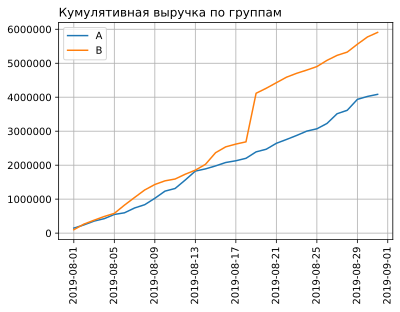

In [16]:
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue'], label = 'A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue'], label = 'B')
plt.legend()
plt.grid()
plt.xticks(rotation = 90)
plt.title('Кумулятивная выручка по группам', loc = 'left')
plt.xlabel('')
plt.savefig('../images/cummulativeRevenue.png', bbox_inches = 'tight')
plt.show()

Выручка почти равномерно увеличивается в течение всего теста. Хотя выручка группы B увеличивается быстрее из-за резкого роста примерно 18-19 августа 2019 года. Возможно, там какие-то аномалии.

### Кумулятивный средний чек

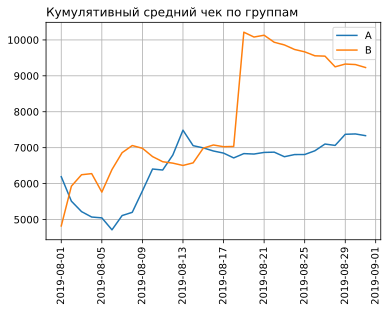

In [17]:
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue'] / cummulativeRevenueA['orders'], label = 'A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue'] / cummulativeRevenueB['orders'], label = 'B')
plt.legend()
plt.grid()
plt.xticks(rotation = 90)
plt.title('Кумулятивный средний чек по группам', loc = 'left')
plt.xlabel('')
plt.savefig('../images/cummulativeAverageOrder.png', bbox_inches = 'tight')
plt.show()

Похоже, что средний чек становится равномерным ближе к концу теста: установился для группы A и падает для группы B. Но для группы B заметен тот же резкий рост 18-19 августа 2019 года: возможно, в группу B в это время попали крупные заказы. Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне или исключить аномалию.

In [18]:
mergedCummulativeRevenue = cummulativeRevenueA.merge(cummulativeRevenueB, on = 'date', how = 'left',
                                                     suffixes = ['A', 'B'])

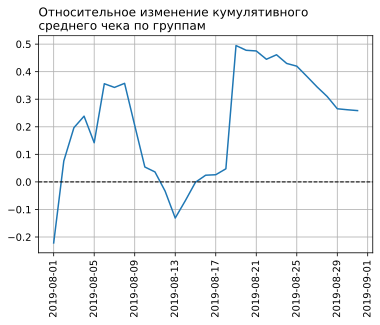

In [19]:
plt.plot(mergedCummulativeRevenue['date'],
         (mergedCummulativeRevenue['revenueB'] / mergedCummulativeRevenue['ordersB']) /
         (mergedCummulativeRevenue['revenueA'] / mergedCummulativeRevenue['ordersA']) - 1)
plt.axhline(y = 0, color = 'black', linestyle = '--', linewidth = 1)
plt.grid()
plt.xticks(rotation = 90)
plt.title('Относительное изменение кумулятивного\nсреднего чека по группам', loc = 'left')
plt.xlabel('')
plt.savefig('../images/relativeCummulativeRevenue.png', bbox_inches = 'tight')
plt.show()

В нескольких точках график различия между группами резко скачет - точно есть аномалии.

### Кумулятивная конверсия

In [20]:
cummulative['conversion'] = cummulative['orders'] / cummulative['visitors']
cummulativeA = cummulative.query('group == "A"')
cummulativeB = cummulative.query('group == "B"')

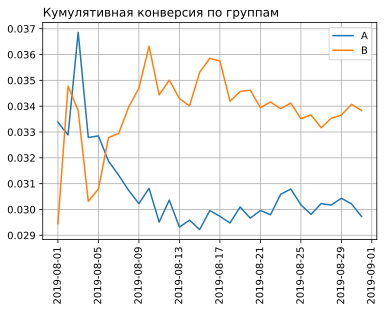

In [21]:
plt.plot(cummulativeA['date'], cummulativeA['conversion'], label = 'A')
plt.plot(cummulativeB['date'], cummulativeB['conversion'], label = 'B')
plt.grid()
plt.legend()
plt.xticks(rotation = 90)
plt.title('Кумулятивная конверсия по группам', loc = 'left')
plt.xlabel('')
plt.savefig('../images/cummulativeConversion.png', bbox_inches = 'tight')
plt.show()

График практически симметричен. В начале теста были колебания, но потом конверсия группы B значительно превысила конверсию группы A и они стабилизировались.

In [22]:
mergedCummulativeConversions = cummulativeA[['date','conversion']].merge(cummulativeB[['date','conversion']],
                                                                         on = 'date', how = 'left',
                                                                         suffixes = ['A', 'B'])

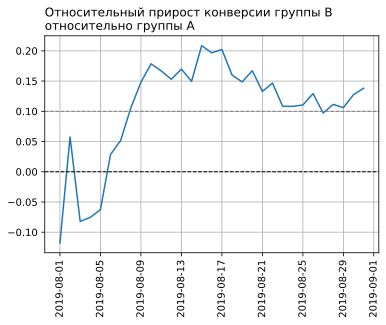

In [23]:
plt.plot(mergedCummulativeConversions['date'],
         mergedCummulativeConversions['conversionB'] / mergedCummulativeConversions['conversionA'] - 1)
plt.axhline(y = 0, color = 'black', linestyle = '--', linewidth = 1)
plt.axhline(y = 0.1, color = 'gray', linestyle = '--', linewidth = 1)
plt.grid()
plt.xticks(rotation = 90)
plt.title('Относительный прирост конверсии группы B\nотносительно группы A', loc = 'left')
plt.xlabel('')
plt.savefig('../images/relativeCummulativeConversion.png', bbox_inches = 'tight')
plt.show()

### Количетсво заказов

In [24]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis = 1)
    .groupby('visitorId', as_index = False).agg({'transactionId' : pd.Series.nunique})
)

ordersByUsers.columns = ['userId', 'orders']

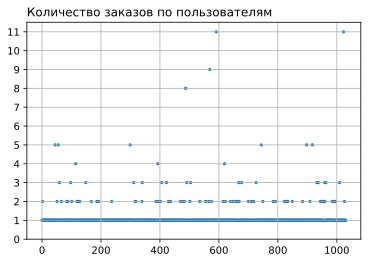

In [25]:
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'], s = 5)
ys = range(ordersByUsers['orders'].max() + 1)
y_ticks = [x for x in range(ordersByUsers['orders'].max() + 1)]
plt.yticks(ys, y_ticks)
plt.grid()
plt.title('Количество заказов по пользователям', loc = 'left')
plt.xlabel('')
plt.show()

Много людей с 2-3 заказами, но насколько много непонятно.

In [26]:
print ('Не более 5% пользователей оформляли больше',
       np.percentile(ordersByUsers['orders'], [95, 99])[0], 'заказов, а больше',
       np.percentile(ordersByUsers['orders'], [95, 99])[1], 'оформили только 1% пользователей.')

Не более 5% пользователей оформляли больше 2.0 заказов, а больше 4.0 оформили только 1% пользователей.


Выберем границу аномальных данных - 3 заказа. Тогда в выбросы попадут только 5% пользователей.

### Стоимость заказов

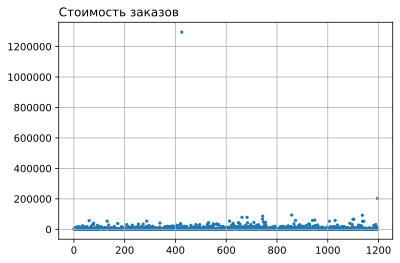

In [27]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'], s = 5)
plt.grid()
plt.title('Стоимость заказов', loc = 'left')
plt.xlabel('')
plt.show()

Есть 2 заказа стоимостью больше 200000, из-за чего остальные заказы "слиплись" на графике и понять границу аномалий без рассчёта перцентилей практически невозможно.

In [28]:
print ('Не более 5% заказов стоили больше {:.2f},'.format(
       np.percentile(orders['revenue'], [95, 99])[0]), 'а больше {:.2f}'.format(
       np.percentile(orders['revenue'], [95, 99])[1]), 'стоили только 1% заказов.')

Не более 5% заказов стоили больше 28000.00, а больше 58233.20 стоили только 1% заказов.


Выберем границу аномальных данных >28000.00. Тогда в выбросы попадут только 5% заказов.

## Подготовка данных для определения статистической значимости

In [29]:
visitorsADaily = visitors.query('group == "A"')[['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = (
    visitorsADaily
    .apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]
           .agg({'date' : 'max',
                 'visitorsPerDateA' : 'sum'}), axis = 1)
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [30]:
visitorsBDaily = visitors.query('group == "B"')[['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = (
    visitorsBDaily
    .apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]
           .agg({'date' : 'max',
                 'visitorsPerDateB' : 'sum'}), axis = 1)
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [31]:
ordersADaily = (
    orders.query('group == "A"')[['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index = False)
    .agg({'transactionId' : pd.Series.nunique,
          'revenue' : 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

In [32]:
ordersACummulative = (
    ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date'] <= x['date']]
                       .agg({'date' : 'max',
                             'ordersPerDateA' : 'sum',
                             'revenuePerDateA' : 'sum'}), axis = 1).sort_values('date')
)
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

In [33]:
ordersBDaily = (
    orders.query('group == "B"')[['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId' : pd.Series.nunique,
          'revenue' : 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

In [34]:
ordersBCummulative = (
    ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']]
                       .agg({'date' : 'max',
                             'ordersPerDateB' : 'sum',
                             'revenuePerDateB' : 'sum'}), axis = 1).sort_values('date')
)
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [35]:
data = (
    ordersADaily.merge(ordersBDaily, on = 'date', how = 'left')
    .merge(ordersACummulative, on = 'date', how = 'left')
    .merge(ordersBCummulative, on = 'date', how = 'left')
    .merge(visitorsADaily, on = 'date', how = 'left')
    .merge(visitorsBDaily, on = 'date', how = 'left')
    .merge(visitorsACummulative, on = 'date', how = 'left')
    .merge(visitorsBCummulative, on = 'date', how = 'left')
)

In [36]:
ordersByUsersA = (
    orders.query('group == "A"')
    .groupby('visitorId', as_index = False)
    .agg({'transactionId' : pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

In [37]:
ordersByUsersB = (
    orders.query('group == "B"')
    .groupby('visitorId', as_index = False)
    .agg({'transactionId' : pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

In [38]:
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index = np.arange(data['visitorsPerDateA'].sum() -
                                                    len(ordersByUsersA['orders'])), name = 'orders')], axis = 0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index = np.arange(data['visitorsPerDateB'].sum() -
                                                    len(ordersByUsersB['orders'])), name = 'orders')], axis = 0)

### Статистическая значимость различий между группами по "сырым" данным

In [39]:
print("p-value = {:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Относительный прирост конверсии группы B к конверсии группы A составляет {:.3%}".format(
    sampleB.mean() / sampleA.mean() - 1))

p-value = 0.008
Относительный прирост конверсии группы B к конверсии группы A составляет 13.808%


p-value значительно меньше 0.05, значит в конверсии между группами есть статистически значимые различия.

In [40]:
print("p-value = {:.3f}".format(
    stats.mannwhitneyu(orders.query('group == "A"')['revenue'], orders.query('group == "B"')['revenue'])[1]))
print("Средний чек группы B отличается от среднего чека группы A на {:.3%}".format(
    orders.query('group == "B"')['revenue'].mean() / orders.query('group == "A"')['revenue'].mean() - 1))

p-value = 0.365
Средний чек группы B отличается от среднего чека группы A на 25.871%


p-value значительно больше 0.05, значит нет причин предполагать статистически значимые различия среднего чека между группами A и B. Однако средний чек группы B больше среднего чека группы A на 25.8%, а это немало.

### Статистическая значимость различий между группами по "очищенным" данным

In [41]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'], 
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0)
    .drop_duplicates()
    .sort_values()
)
print('Всего "отсекаем"', abnormalUsers.shape[0], 'аномальных пользователя.')

Всего "отсекаем" 74 аномальных пользователя.


In [42]:
sampleAFiltered = (
    pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
               pd.Series(0, index = np.arange(data['visitorsPerDateA'].sum() -
                                              len(ordersByUsersA['orders'])), name = 'orders')], axis = 0)
)

sampleBFiltered = (
    pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],
               pd.Series(0, index = np.arange(data['visitorsPerDateB'].sum() -
                                              len(ordersByUsersB['orders'])), name = 'orders')], axis = 0)
)

In [43]:
print("p-value = {:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Относительный прирост конверсии группы B к конверсии группы A составляет {:.3%}".format(
    sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

p-value = 0.007
Относительный прирост конверсии группы B к конверсии группы A составляет 17.270%


p-value значительно меньше 0.05, значит в конверсии между группами по "очищенным" данным всё ещё есть статистически значимые различия.  
Относительный прирост конверсии вырос на 3.4%

In [44]:
print("p-value = {:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(orders['group'] == 'A',
                          np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(orders['group'] == 'B',
                          np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("Средний чек группы B отличается от среднего чека группы A на {:.3%}".format(
    orders[np.logical_and(orders['group'] == 'B',
                          np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() /
    orders[np.logical_and(orders['group'] == 'A',
                          np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

p-value = 0.369
Средний чек группы B отличается от среднего чека группы A на -1.962%


p-value значительно больше 0.05, значит нет причин предполагать статистически значимые различия среднего чека между группами A и B. И после исключения аномалий средний чек группы B оказался почти на 2% меньше среднего чека группы A.

# **Выводы**
Наиболее перспективные гипотезы при приоритизации методом ICE: 9, 1, 8, 7 и 3.  
Наиболее перспективные гипотезы при приоритизации методом RICE: 8, 3, 1, 7 и 9.  
Не очень понимаю, почему гипотеза с баннерами на главной странице имеет оценку охвата `Reach` 5, а цвет фона той же главной страницы - всего 3. Появляются сомнения в достоверности приоритизации, если изначальные оценки были не совсем верные.  

Непонятно, какая именно гипотеза проверялось в данном A/B-тесте, поэтому трудно сделать какие-либо предположения о том, почему метрики меняются именно так, как меняются.  
Похоже, группы были распределены не совсем верно: например, пользователь с Id 199603092 попал в обе группы, и он такой не один. Думаю, если бы я за неделю несколько раз увидела разный дизайн страницы в разные дни, это бы повлияло на моё решение сделать заказ, так что предполагаю, что данные искажены.  

В группу B попали нетипичные пользователи, которые сделали необычно много заказов или необычно дорогие заказы.  
![](../images/cummulativeRevenue.png)

.|.
-|-
![](../images/cummulativeConversion.png)|![](../images/relativeCummulativeConversion.png)
![](../images/cummulativeAverageOrder.png)|![](../images/relativeCummulativeRevenue.png)

Явно такая аномалия сущесвтует примерно 18-19 августа.  
График различия конверсии между группами сообщает, что результаты группы B лучше группы A: зафиксировались около среднего значения.  
График различия среднего чека колеблется: он-то и позволил найти аномалии. Сделать из этого графика определённые выводы нельзя.  

После рассчёта перцентилей границей аномальных значений выбраны >2 заказов на одно пользователй и >28000 стоимость одного заказа. Таким образом исключены 74 пользователя.  

-|"сырые" данные|"очищенные" данные
-|-|-
p-value различия конверсии|0.008|0.007
относительный прирост конверсии|13.808%|17.27%
p-value различия среднего чека|0.365|0.369
относительное различие среднего чека|25.871%|-1.962%

Такая разница в относительном различии среднего чека по "сырым" и по "очищенным" данным говорит о наличии аномальных значений в группе B.  

Так как зафиксирован прирост конверсии в группе B, тест можно считать успешным и перейти к проверке следующей гипотезы. Однако, я бы настаивала на более чётком разделении по группам для проведения тестирования и более внимательной оценке параметров гипотез перед приоритизацией.